In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df=df.drop_duplicates()

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df=df[df['Quantity']>0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [10]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [11]:
df.to_excel('cleaned-retail.xlsx')

In [12]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
data=df.copy()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
RFM_data=data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})
RFM_data['InvoiceDate']=RFM_data['InvoiceDate'].astype(int)
RFM_data.rename(columns={'InvoiceDate':'Recency',
                        'InvoiceNo':'Frequency',
                        'TotalAmount':'Monetary'},inplace=True)
RFM_data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [14]:
RFM_data.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,90.512100,2048.215924
std,100.007757,225.515328,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,306.455000
50%,50.000000,41.000000,668.560000
75%,141.500000,98.000000,1660.315000
max,373.000000,7676.000000,280206.020000


In [15]:
quantiles=RFM_data.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [16]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [17]:
RFM_data['R'] = RFM_data['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFM_data['F'] = RFM_data['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFM_data['M'] = RFM_data['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFM_data.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [18]:
RFM_data['RFMSegment']=RFM_data.R.map(str)+RFM_data.F.map(str)+RFM_data.M.map(str)
RFM_data['RFMScore']=RFM_data['R']+RFM_data['F']+RFM_data['M']
RFM_data.head()

,Recency,Frequency,Monetary,R,F,M,RFMSegment,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [19]:
Loyalty_Level = ['Platinum_Class', 'Gold_Class', 'Silver_Class', 'Bronze_Class']
Score_cuts = pd.qcut(RFM_data.RFMScore, q = 4, labels = Loyalty_Level)
RFM_data['Loyalty_Level'] = Score_cuts.values
RFM_data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMSegment,RFMScore,Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver_Class
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum_Class
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold_Class
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum_Class
4,12350.0,310,17,334.40,4,4,3,443,11,Bronze_Class


In [20]:
RFM_data.to_excel('rfm_data.xlsx')

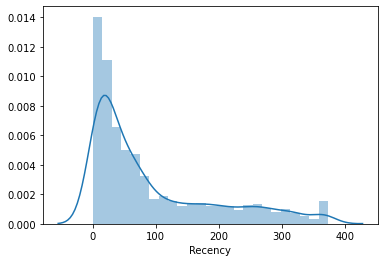

In [21]:
sns.distplot(RFM_data['Recency'])

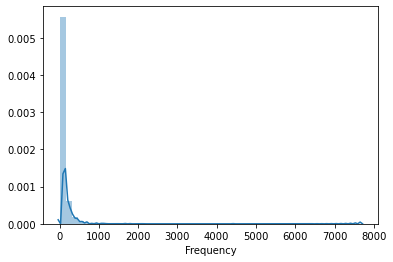

In [22]:
sns.distplot(RFM_data['Frequency'])

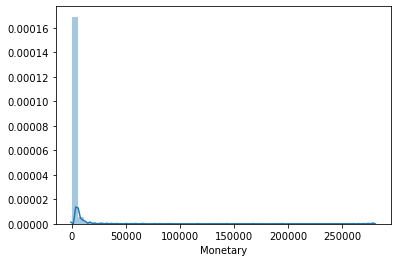

In [23]:
sns.distplot(RFM_data['Monetary'])

In [24]:
def handle_zero(val):
    if val<=0:
        return 1
    else:
        return val

In [25]:
log_data = RFM_data.copy()
log_data.head()

,Recency,Frequency,Monetary,R,F,M,RFMSegment,RFMScore,Loyalty_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver_Class
12347.0,2,182,4310.00,1,1,1,111,3,Platinum_Class
12348.0,75,31,1797.24,3,3,1,331,7,Gold_Class
12349.0,18,73,1757.55,2,2,1,221,5,Platinum_Class
12350.0,310,17,334.40,4,4,3,443,11,Bronze_Class


In [26]:
log_data.drop(['R','F','M','RFMSegment','RFMScore','Loyalty_Level'],axis=1,inplace=True)
log_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [27]:
log_data['Recency']=[handle_zero(x) for x in log_data.Recency]
log_data['Frequency']=[handle_zero(x) for x in log_data.Frequency]
log_data['Monetary']=[handle_zero(x) for x in log_data.Monetary]

In [28]:
log_data['Recency']=[np.log(x) for x in log_data.Recency]
log_data['Frequency']=[np.log(x) for x in log_data.Frequency]
log_data['Monetary']=[np.log(x) for x in log_data.Monetary]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(log_data) 

In [30]:
from sklearn.cluster import KMeans

In [31]:
sse={}
for n in range(1,15):
    model=KMeans(n_clusters=n)
    model.fit(scaled_data)
    sse[n]=model.inertia_

In [32]:
km_data=pd.DataFrame(columns=['No_of_cluster','Cost'])
km_data.No_of_cluster=sse.keys()
km_data.Cost=sse.values()
km_data.head()

,No_of_cluster,Cost
0,1,13017.000000
1,2,6903.000576
2,3,5320.705339
3,4,4468.296797
4,5,3782.916385


In [33]:
km_data.to_excel('km_insight.xlsx')

Text(0, 0.5, 'Inertia')

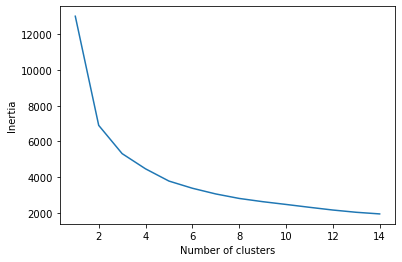

In [34]:
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [35]:
final_model=KMeans(n_clusters=3)
final_model.fit(scaled_data)
RFM_data['Cluster']=final_model.labels_
RFM_data.head()

,Recency,Frequency,Monetary,R,F,M,RFMSegment,RFMScore,Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver_Class,2
12347.0,2,182,4310.00,1,1,1,111,3,Platinum_Class,1
12348.0,75,31,1797.24,3,3,1,331,7,Gold_Class,2
12349.0,18,73,1757.55,2,2,1,221,5,Platinum_Class,2
12350.0,310,17,334.40,4,4,3,443,11,Bronze_Class,0


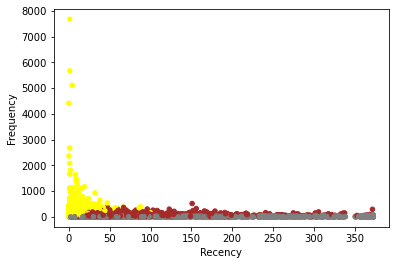

In [36]:
Colors = ["grey", "yellow","brown"]
RFM_data['Color'] = RFM_data['Cluster'].map(lambda p: Colors[p])
RFM_data.plot(x='Recency',y='Frequency',kind='scatter',c=RFM_data['Color'])

In [37]:
RFM_data.drop(['R','F','M','RFMSegment','RFMScore','Loyalty_Level','Color'],axis=1,inplace=True)
RFM_data.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,325,1,77183.60,2
12347.0,2,182,4310.00,1
12348.0,75,31,1797.24,2
12349.0,18,73,1757.55,2
12350.0,310,17,334.40,0


In [38]:
rfm_melt = pd.melt(RFM_data,id_vars=['Cluster'],value_vars=['Recency', 'Frequency', 'Monetary'],
var_name='Metric',value_name='Value')
rfm_melt.head()

,Cluster,Metric,Value
0,2,Recency,325.0
1,1,Recency,2.0
2,2,Recency,75.0
3,2,Recency,18.0
4,0,Recency,310.0


In [39]:
rfm_melt.to_excel('segmented.xlsx')